In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, roc_curve,auc,f1_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')


In [104]:
# pip install imblearn

In [105]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [106]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


<AxesSubplot:ylabel='Outcome'>

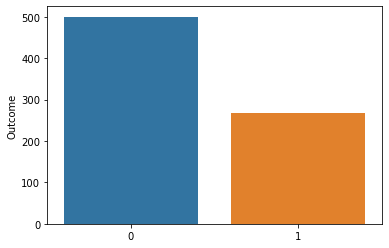

In [107]:
sns.barplot(x=df.Outcome.value_counts().index ,y = df.Outcome.value_counts())

In [108]:
X = df.drop('Outcome',axis =1)
y= df['Outcome']

In [109]:
over_sampler = SMOTE(random_state=2)
X_ov , y_ov = under_sampler.fit_resample(X,y)

In [110]:
X_un.shape

(1000, 7)

In [111]:
y_un.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [112]:
# as this logistic regression is distance based, scaling is required
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_ov)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.650323,-0.998062,0.879720,-0.690136,0.116318,0.437155,1.412494
1,-1.285163,-0.177245,0.509701,-0.690136,-0.802400,-0.415423,-0.257536
2,1.725594,-0.279847,-1.278724,-0.690136,-1.235510,0.576162,1.588286
3,0.711767,-0.177245,0.139682,0.065270,-0.605532,-0.983809,-1.136499
4,0.711767,-1.511073,0.879720,0.659952,1.363149,5.568071,-0.081744


In [113]:
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ov, test_size=0.2, random_state=2)

In [114]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [115]:
# training accuracy--> way1
model.score(X_train,y_train)

0.74875

In [116]:
# training accuracy
model.score(X_test,y_test)

0.795

In [118]:
pred_test = model.predict(X_test)
pred_test

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [119]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        91
           1       0.84      0.77      0.80       109

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
     precision    recall  f1-score   support

0       0.83      0.87      0.85       109
1       0.65      0.58      0.61        45

    accuracy                           0.79       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154

In [121]:
scalar.inverse_transform(X_scaled)

array([[148.        ,  50.        ,  35.        , ...,  33.6       ,
          0.627     ,  50.        ],
       [ 85.        ,  66.        ,  29.        , ...,  26.6       ,
          0.351     ,  31.        ],
       [183.        ,  64.        ,   0.        , ...,  23.3       ,
          0.672     ,  52.        ],
       ...,
       [135.        ,  61.        ,  30.        , ...,  28.79375189,
          0.31244839,  26.        ],
       [186.        ,  82.        ,  31.        , ...,  35.75381768,
          0.54158601,  57.        ],
       [182.        ,  83.        ,  19.        , ...,  35.01307783,
          0.60783193,  44.        ]])

In [ ]:
0
1